# Analyse exploratoire du dataset

Le fichier `train_dataset.csv` contient 1017 exemples et 26 colonnes. Il s'agit d'un jeu de données tabulaires pour l'apprentissage automatique, adapté à une tâche de régression (prédiction de la productivité réelle).

- **Colonnes principales** :
    - team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, month
    - Variables catégorielles encodées (one-hot) : quarter, department, day
    - **Cible à prédire** : `actual_productivity`
- **Valeurs manquantes** : la colonne `wip` contient 423 valeurs manquantes, les autres colonnes sont complètes.
- **Statistiques sur la cible (`actual_productivity`)** :
    - Moyenne : 0.7365
    - Min : 0.2337
    - Max : 1.1081
    - Écart-type : 0.1743

Ci-dessous, l'analyse statistique détaillée avec pandas.

In [159]:
import pandas as pd

df = pd.read_csv('../data/train_dataset.csv')
print('Shape:', df.shape)
print('\nColumns:', df.columns.tolist())
print('\nHead:\n', df.head())
print('\nMissing values per column:\n', df.isnull().sum())
print('\nDescribe:\n', df.describe())

Shape: (1017, 26)

Columns: ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'month', 'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing', 'department_finishing ', 'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'actual_productivity']

Head:
    team  targeted_productivity    smv    wip  over_time  incentive  idle_time  \
0     9                   0.75   3.94    NaN        960          0        0.0   
1     7                   0.65  30.10  909.0       7080          0        0.0   
2     3                   0.80   4.15    NaN       1440          0        0.0   
3     1                   0.65  22.53  762.0       5040          0        0.0   
4     4                   0.70  30.10  767.0       3300         50        0.0   

   idle_men  no_of_style_change  no_of_worker

## Liste des colonnes du dataset

- team
- targeted_productivity
- smv
- wip
- over_time
- incentive
- idle_time
- idle_men
- no_of_style_change
- no_of_workers
- month
- quarter_Quarter1
- quarter_Quarter2
- quarter_Quarter3
- quarter_Quarter4
- quarter_Quarter5
- department_finishing
- department_finishing 
- department_sweing
- day_Monday
- day_Saturday
- day_Sunday
- day_Thursday
- day_Tuesday
- day_Wednesday
- actual_productivity

Ci-dessous, une analyse détaillée de chaque variable.

# Nettoyage du dataset

Dans cette section, nous nettoyons le dataset : gestion des valeurs manquantes, suppression des doublons, vérification des types, traitement des outliers et nettoyage des variables catégorielles.

In [160]:
# Gestion des valeurs manquantes
# Exemple : imputation de la colonne 'wip' par la médiane
if df['wip'].isnull().sum() > 0:
    median_wip = df['wip'].median()
    df['wip'] = df['wip'].fillna(median_wip)
print(f"Valeurs manquantes restantes :\n{df.isnull().sum()}")

Valeurs manquantes restantes :
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
month                    0
quarter_Quarter1         0
quarter_Quarter2         0
quarter_Quarter3         0
quarter_Quarter4         0
quarter_Quarter5         0
department_finishing     0
department_finishing     0
department_sweing        0
day_Monday               0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
actual_productivity      0
dtype: int64


In [161]:
# Suppression des doublons
avant = df.shape[0]
df = df.drop_duplicates()
apres = df.shape[0]
print(f"Doublons supprimés : {avant - apres}")

Doublons supprimés : 0


In [162]:
# Vérification des types de colonnes
print(df.dtypes)
# Exemple : conversion de 'month' en int si besoin
df['month'] = df['month'].astype(int)

team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
month                      int64
quarter_Quarter1           int64
quarter_Quarter2           int64
quarter_Quarter3           int64
quarter_Quarter4           int64
quarter_Quarter5           int64
department_finishing       int64
department_finishing       int64
department_sweing          int64
day_Monday                 int64
day_Saturday               int64
day_Sunday                 int64
day_Thursday               int64
day_Tuesday                int64
day_Wednesday              int64
actual_productivity      float64
dtype: object


In [163]:
# Détection et traitement des outliers (valeurs aberrantes)
import numpy as np
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col} : {outliers} outliers")
    # Optionnel : remplacer les outliers par les bornes
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

team : 0 outliers
targeted_productivity : 63 outliers
smv : 0 outliers
wip : 295 outliers
over_time : 1 outliers
incentive : 11 outliers
idle_time : 17 outliers
idle_men : 17 outliers
no_of_style_change : 133 outliers
no_of_workers : 0 outliers
quarter_Quarter1 : 0 outliers
quarter_Quarter2 : 0 outliers
quarter_Quarter3 : 173 outliers
quarter_Quarter4 : 212 outliers
quarter_Quarter5 : 37 outliers
department_finishing : 205 outliers
department_finishing  : 218 outliers
department_sweing : 0 outliers
day_Monday : 164 outliers
day_Saturday : 155 outliers
day_Sunday : 167 outliers
day_Thursday : 168 outliers
day_Tuesday : 174 outliers
day_Wednesday : 189 outliers
actual_productivity : 51 outliers


In [164]:
# Nettoyage des variables catégorielles
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()
    print(f"Valeurs uniques pour {col} : {df[col].unique()}")

# 1. Analyse de la productivité


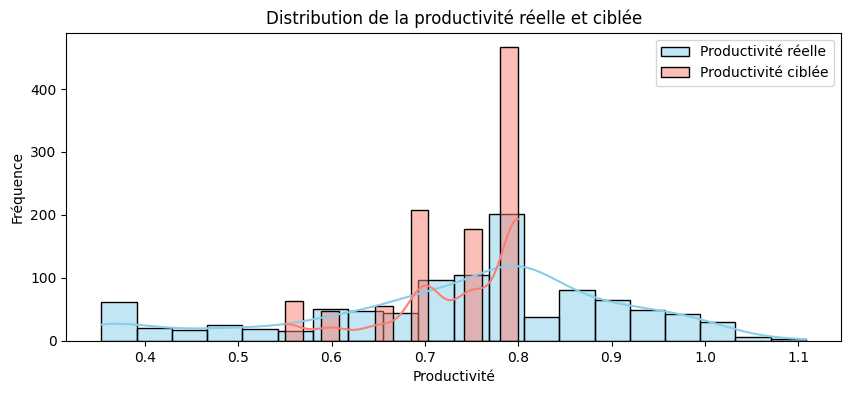

In [165]:
# Histogramme : Distribution de la productivité réelle et ciblée
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))
sns.histplot(df['actual_productivity'], kde=True, color='skyblue', label='Productivité réelle')
sns.histplot(df['targeted_productivity'], kde=True, color='salmon', label='Productivité ciblée')
plt.legend()
plt.title('Distribution de la productivité réelle et ciblée')
plt.xlabel('Productivité')
plt.ylabel('Fréquence')
plt.show()

### Boxplot : Comparaison de la productivité réelle par équipe


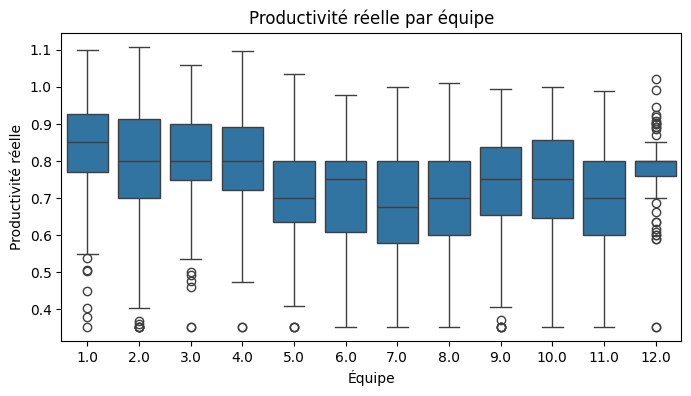

In [166]:
plt.figure(figsize=(8,4))
sns.boxplot(x='team', y='actual_productivity', data=df)
plt.title('Productivité réelle par équipe')
plt.xlabel('Équipe')
plt.ylabel('Productivité réelle')
plt.show()

### Scatter Plot : Productivité réelle vs facteurs (over_time, incentive, idle_time)


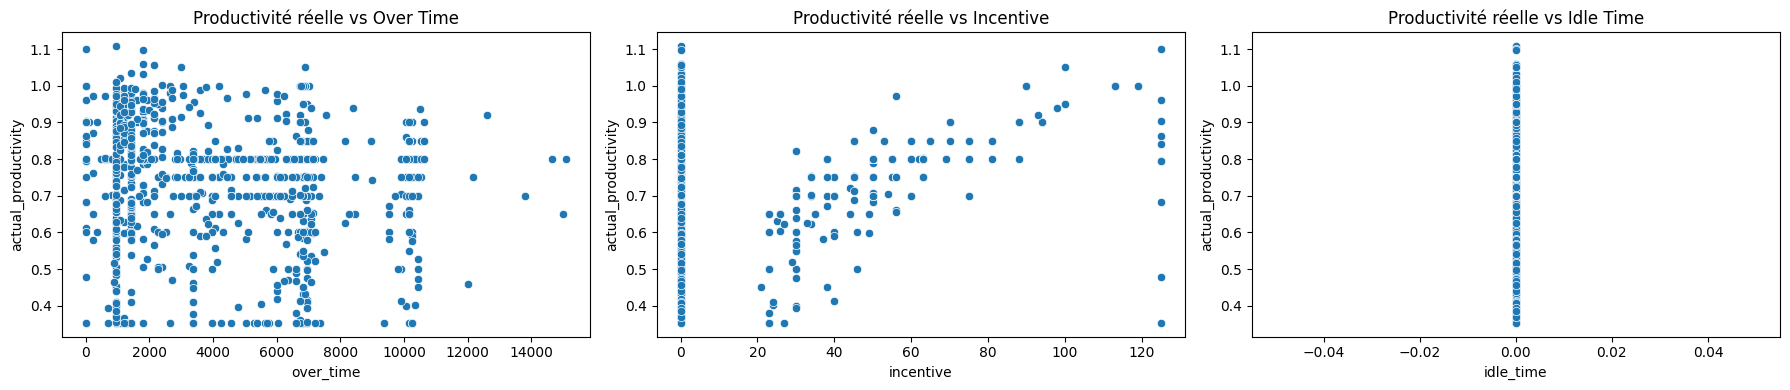

In [167]:
fig, axes = plt.subplots(1, 3, figsize=(18,4))
sns.scatterplot(x='over_time', y='actual_productivity', data=df, ax=axes[0])
axes[0].set_title('Productivité réelle vs Over Time')
sns.scatterplot(x='incentive', y='actual_productivity', data=df, ax=axes[1])
axes[1].set_title('Productivité réelle vs Incentive')
sns.scatterplot(x='idle_time', y='actual_productivity', data=df, ax=axes[2])
axes[2].set_title('Productivité réelle vs Idle Time')
plt.tight_layout()
plt.show()

# 2. Analyse des équipes


### Bar Chart : Productivité moyenne par équipe


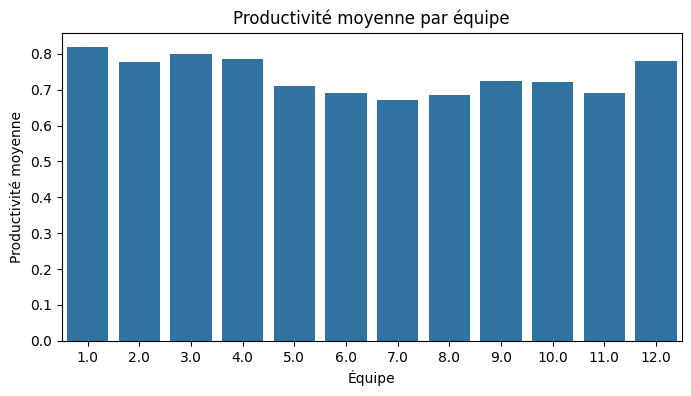

In [168]:
team_prod = df.groupby('team')['actual_productivity'].mean().sort_values()
plt.figure(figsize=(8,4))
sns.barplot(x=team_prod.index, y=team_prod.values)
plt.title('Productivité moyenne par équipe')
plt.xlabel('Équipe')
plt.ylabel('Productivité moyenne')
plt.show()

### Pie Chart : Répartition des équipes dans le dataset


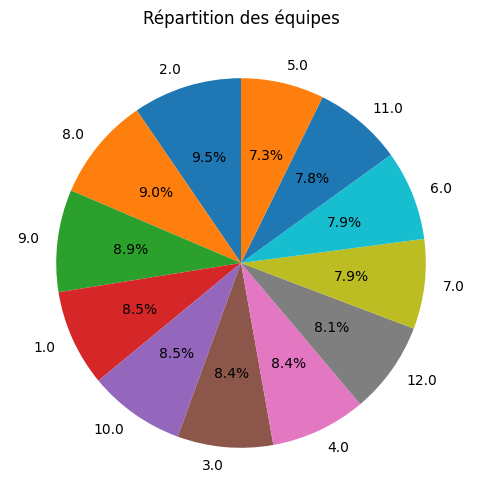

In [169]:
team_counts = df['team'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(team_counts, labels=team_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des équipes')
plt.show()

# 3. Analyse temporelle


### Line Chart : Évolution de la productivité réelle au fil des mois


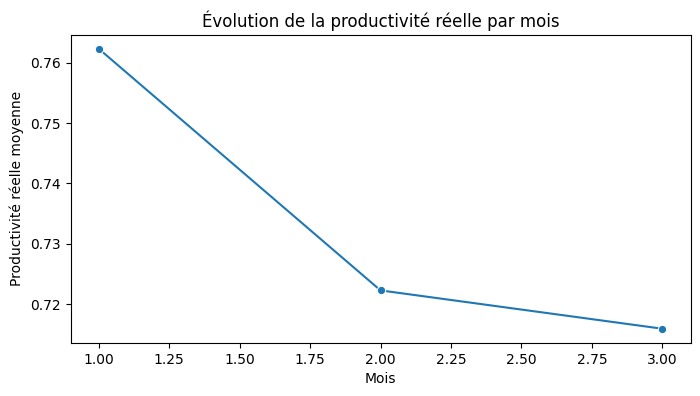

In [170]:
monthly_prod = df.groupby('month')['actual_productivity'].mean()
plt.figure(figsize=(8,4))
sns.lineplot(x=monthly_prod.index, y=monthly_prod.values, marker='o')
plt.title('Évolution de la productivité réelle par mois')
plt.xlabel('Mois')
plt.ylabel('Productivité réelle moyenne')
plt.show()

### Heatmap : Corrélation entre les jours de la semaine et la productivité réelle


c:\Users\yohar\miniconda3\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\yohar\miniconda3\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


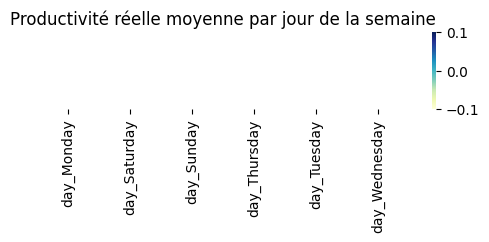

In [171]:
days = [col for col in df.columns if col.startswith('day_')]
day_prod = {day: df[df[day]==1]['actual_productivity'].mean() for day in days}
plt.figure(figsize=(6,1))
sns.heatmap([list(day_prod.values())], annot=True, fmt=".2f", cmap='YlGnBu', xticklabels=list(day_prod.keys()))
plt.title('Productivité réelle moyenne par jour de la semaine')
plt.yticks([])
plt.show()

# 4. Analyse des départements


### Bar Chart : Productivité par département


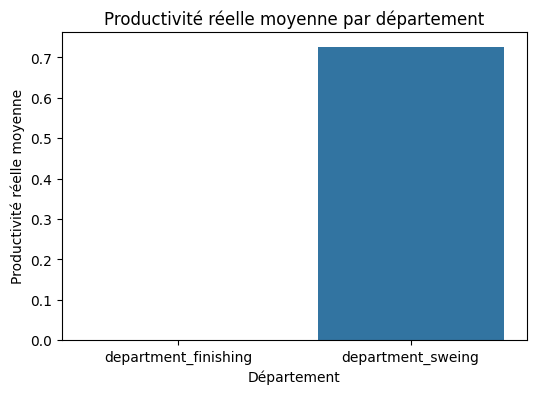

In [172]:
departments = ['department_finishing', 'department_sweing']
dept_prod = {dept: df[df[dept]==1]['actual_productivity'].mean() for dept in departments}
plt.figure(figsize=(6,4))
sns.barplot(x=list(dept_prod.keys()), y=list(dept_prod.values()))
plt.title('Productivité réelle moyenne par département')
plt.xlabel('Département')
plt.ylabel('Productivité réelle moyenne')
plt.show()

### Grouped Bar Chart : Styles de changement par département


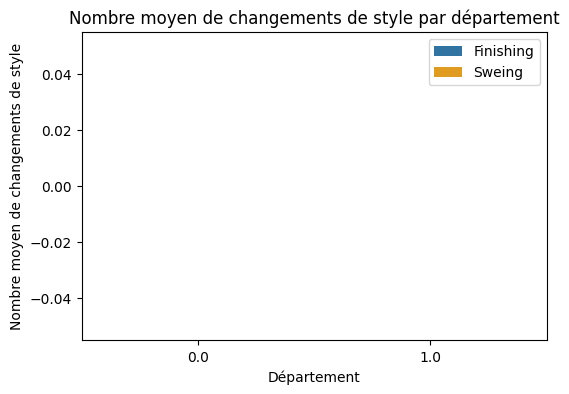

In [173]:
style_dept = df.groupby(['department_finishing', 'department_sweing'])['no_of_style_change'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='department_finishing', y='no_of_style_change', data=style_dept, label='Finishing')
sns.barplot(x='department_sweing', y='no_of_style_change', data=style_dept, label='Sweing', color='orange')
plt.title('Nombre moyen de changements de style par département')
plt.xlabel('Département')
plt.ylabel('Nombre moyen de changements de style')
plt.legend()
plt.show()

# 5. Analyse des heures supplémentaires et des incitations


### Scatter Plot : Over Time vs Incentive


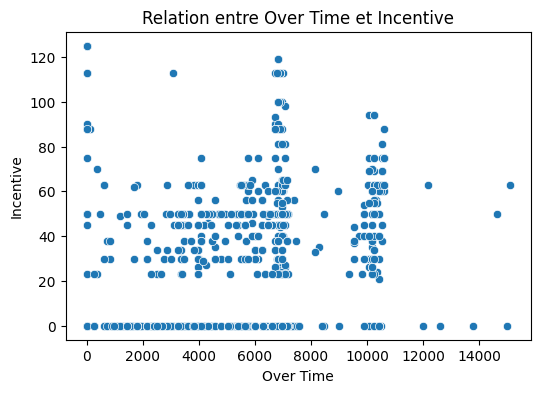

In [174]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='over_time', y='incentive', data=df)
plt.title('Relation entre Over Time et Incentive')
plt.xlabel('Over Time')
plt.ylabel('Incentive')
plt.show()

### Boxplot : Heures supplémentaires par équipe


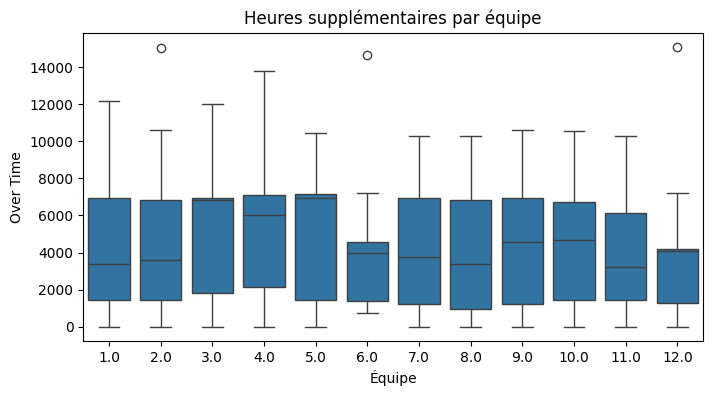

In [175]:
plt.figure(figsize=(8,4))
sns.boxplot(x='team', y='over_time', data=df)
plt.title('Heures supplémentaires par équipe')
plt.xlabel('Équipe')
plt.ylabel('Over Time')
plt.show()

# 6. Analyse des travailleurs


### Histogramme : Distribution du nombre de travailleurs


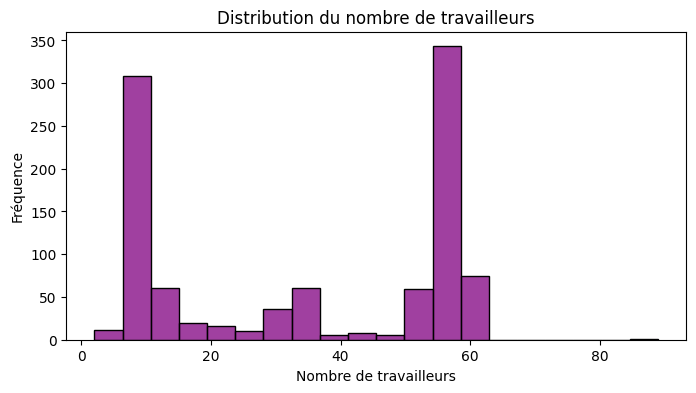

In [176]:
plt.figure(figsize=(8,4))
sns.histplot(df['no_of_workers'], bins=20, color='purple')
plt.title('Distribution du nombre de travailleurs')
plt.xlabel('Nombre de travailleurs')
plt.ylabel('Fréquence')
plt.show()

### Bar Chart : Nombre moyen de travailleurs par équipe


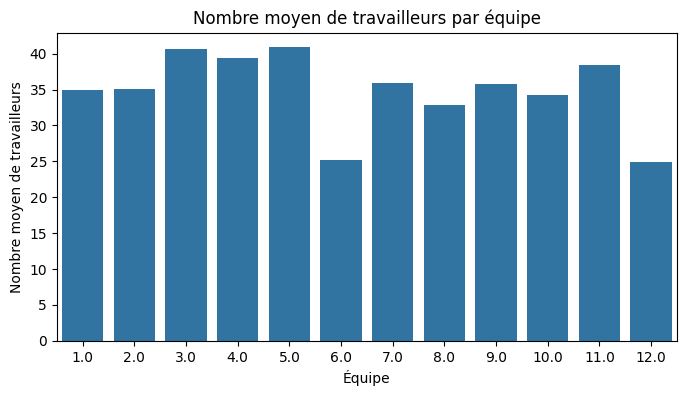

In [177]:
workers_team = df.groupby('team')['no_of_workers'].mean()
plt.figure(figsize=(8,4))
sns.barplot(x=workers_team.index, y=workers_team.values)
plt.title('Nombre moyen de travailleurs par équipe')
plt.xlabel('Équipe')
plt.ylabel('Nombre moyen de travailleurs')
plt.show()

# 7. Analyse des styles de changement


### Bar Chart : Fréquence des changements de style par mois


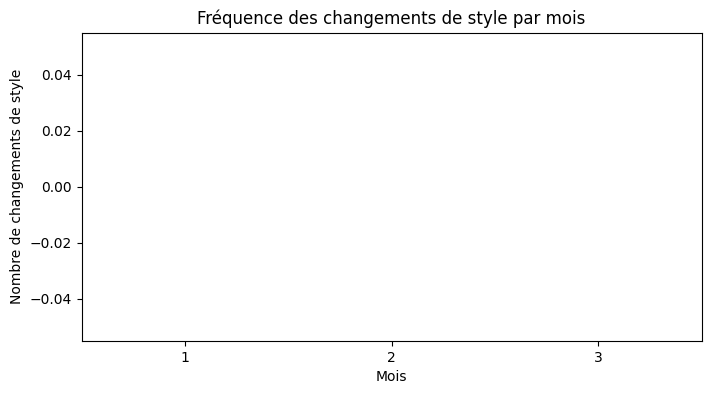

In [178]:
style_month = df.groupby('month')['no_of_style_change'].sum()
plt.figure(figsize=(8,4))
sns.barplot(x=style_month.index, y=style_month.values)
plt.title('Fréquence des changements de style par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de changements de style')
plt.show()

### Pie Chart : Répartition des changements de style


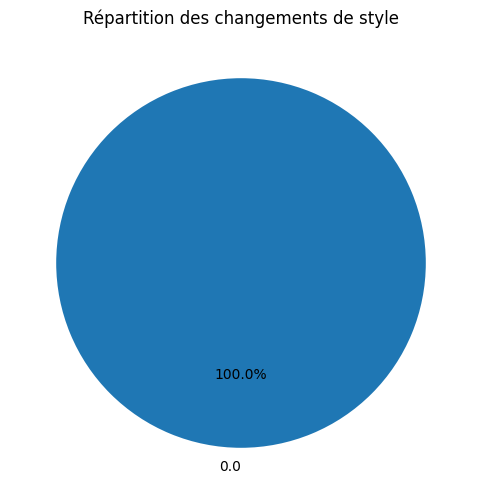

In [179]:
style_counts = df['no_of_style_change'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(style_counts, labels=style_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des changements de style')
plt.show()

# 8. Analyse des variables catégoriques


### Count Plot : Fréquence des jours de la semaine


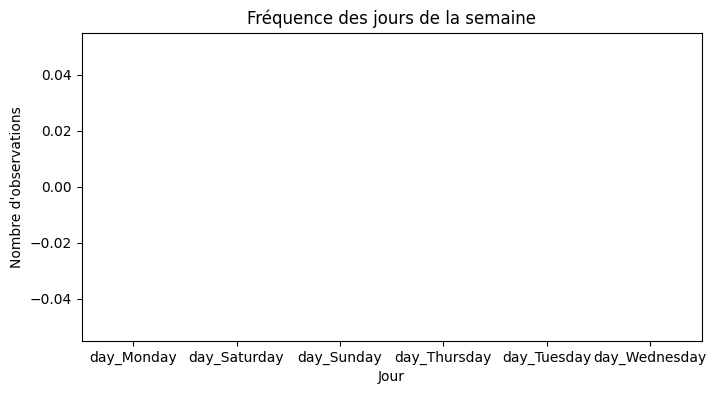

In [180]:
day_counts = {day: df[day].sum() for day in days}
plt.figure(figsize=(8,4))
sns.barplot(x=list(day_counts.keys()), y=list(day_counts.values()))
plt.title('Fréquence des jours de la semaine')
plt.xlabel('Jour')
plt.ylabel("Nombre d'observations")
plt.show()

### Bar Chart : Impact des quarts sur la productivité


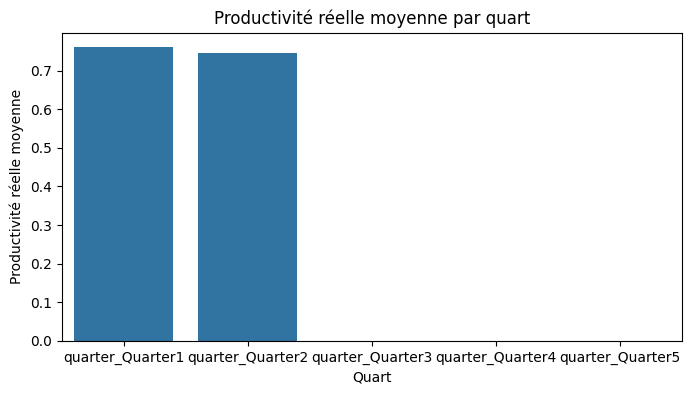

In [181]:
quarters = [col for col in df.columns if col.startswith('quarter_')]
quarter_prod = {q: df[df[q]==1]['actual_productivity'].mean() for q in quarters}
plt.figure(figsize=(8,4))
sns.barplot(x=list(quarter_prod.keys()), y=list(quarter_prod.values()))
plt.title('Productivité réelle moyenne par quart')
plt.xlabel('Quart')
plt.ylabel('Productivité réelle moyenne')
plt.show()

# 9. Analyse des corrélations


### Heatmap : Corrélation entre toutes les variables numériques


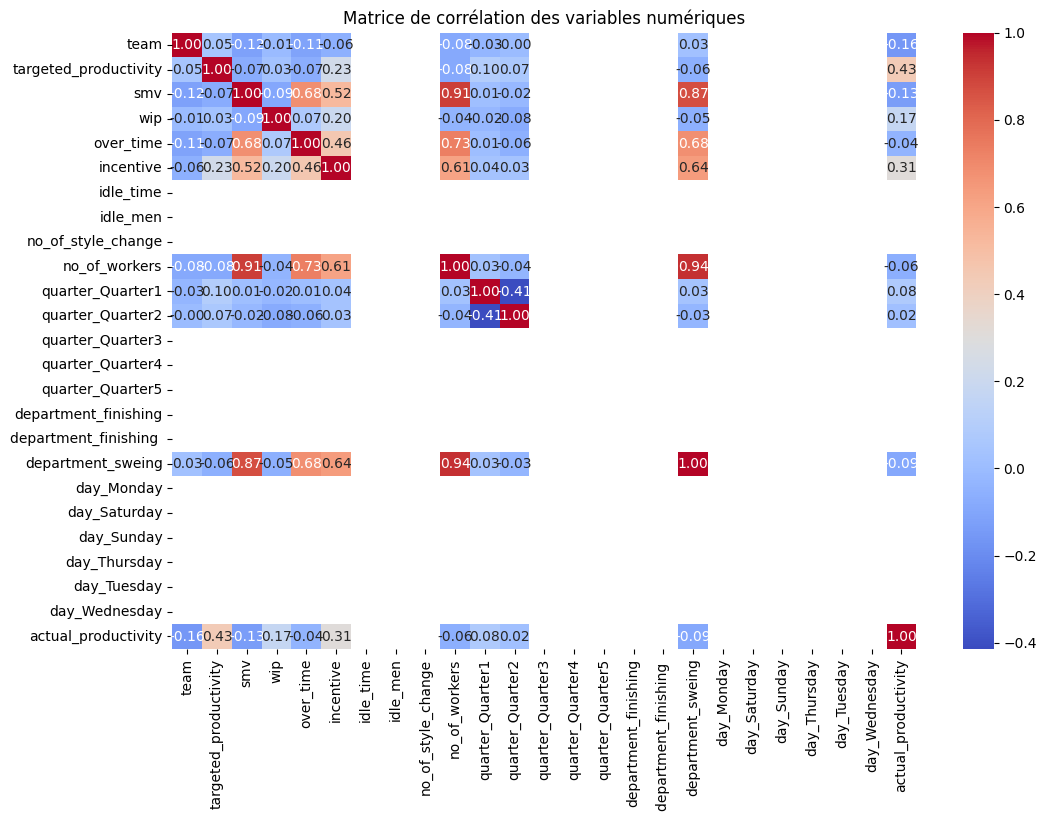

In [182]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matrice de corrélation des variables numériques')
plt.show()

# 10. Analyse des variables d'inactivité


### Scatter Plot : Idle Time vs Idle Men


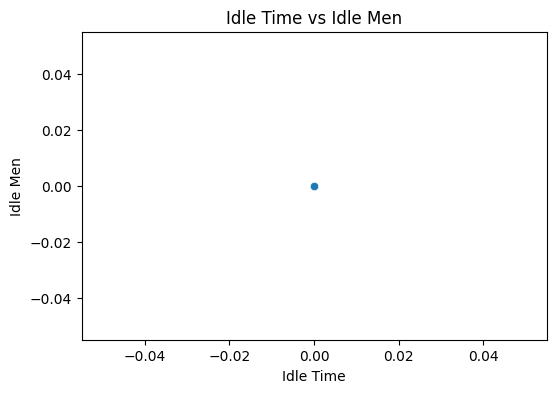

In [183]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='idle_time', y='idle_men', data=df)
plt.title('Idle Time vs Idle Men')
plt.xlabel('Idle Time')
plt.ylabel('Idle Men')
plt.show()

### Boxplot : Idle Time par équipe


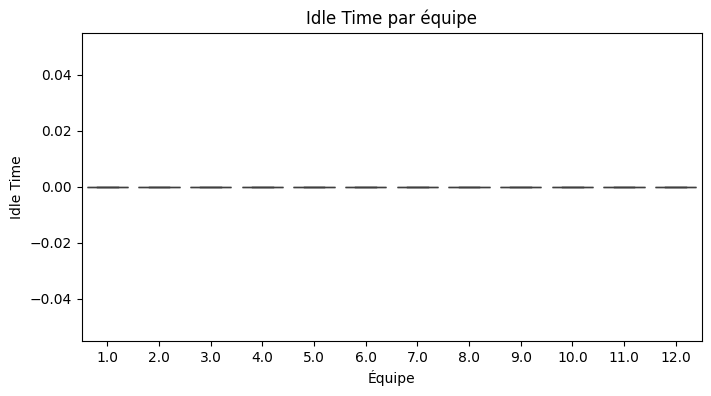

In [184]:
plt.figure(figsize=(8,4))
sns.boxplot(x='team', y='idle_time', data=df)
plt.title('Idle Time par équipe')
plt.xlabel('Équipe')
plt.ylabel('Idle Time')
plt.show()

# 11. Prédiction de la productivité réelle (`actual_productivity`)

Dans cette section, nous allons entraîner un modèle de régression pour prédire la productivité réelle à partir des variables explicatives du dataset.

In [185]:
# Sélection des features et de la cible
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# On retire la colonne cible et les éventuelles colonnes non pertinentes
X = df.drop(['actual_productivity'], axis=1)
y = df['actual_productivity']

# Encodage des variables catégorielles si besoin (déjà one-hot dans ce dataset)
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des variables numériques
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [186]:
# Entraînement d'un modèle de régression linéaire
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred = reg.predict(X_test)

In [187]:
# Évaluation des performances
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"MAE : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R² : {r2:.4f}")

MAE : 0.1076
RMSE : 0.1495
R² : 0.2848


**Interprétation des résultats du modèle de régression linéaire :**

- **MAE (Mean Absolute Error) : 0.1076**  
    L’erreur absolue moyenne indique que, en moyenne, la prédiction de la productivité réelle s’écarte de la valeur réelle d’environ 0.11 unité. Plus cette valeur est faible, plus le modèle est précis.

- **RMSE (Root Mean Squared Error) : 0.1495**  
    La racine carrée de l’erreur quadratique moyenne pénalise davantage les grandes erreurs. Ici, la valeur de 0.15 montre que la plupart des prédictions sont proches de la réalité, mais il existe quelques écarts plus importants.

- **R² (Coefficient de détermination) : 0.2848**  
    Le R² mesure la proportion de la variance de la productivité réelle expliquée par le modèle. Une valeur de 0.28 signifie que le modèle explique environ 28 % de la variabilité de la productivité réelle. Ce score est relativement faible : le modèle capte une partie de l’information, mais il reste une grande marge d’amélioration (autres variables, modèles plus complexes, etc.).

**Conclusion :**  
Le modèle linéaire donne des prédictions avec une erreur modérée, mais il n’explique qu’une faible part de la variance totale. Il peut servir de baseline, mais des modèles plus avancés ou un enrichissement des features pourraient améliorer les performances.

## Régression par Forêt Aléatoire (Random Forest)

Nous allons maintenant entraîner un modèle RandomForestRegressor pour comparer ses performances à la régression linéaire.

In [188]:
# Entraînement d'un modèle Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred_rf = rf.predict(X_test)

In [189]:
# Évaluation des performances du modèle Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MAE : {mae_rf:.4f}")
print(f"Random Forest - RMSE : {rmse_rf:.4f}")
print(f"Random Forest - R² : {r2_rf:.4f}")

Random Forest - MAE : 0.0898
Random Forest - RMSE : 0.1425
Random Forest - R² : 0.3502



**Interprétation des résultats du modèle Random Forest :**

- **MAE (Mean Absolute Error) : 0.0898**  
    L’erreur absolue moyenne est plus faible qu’avec la régression linéaire, indiquant des prédictions plus précises en moyenne.

- **RMSE (Root Mean Squared Error) : 0.1425**  
    La racine de l’erreur quadratique moyenne est également plus basse, ce qui confirme une meilleure performance globale du modèle.

- **R² (Coefficient de détermination) : 0.3502**  
    Le modèle Random Forest explique environ 35 % de la variance de la productivité réelle, soit une amélioration notable par rapport au modèle linéaire.

**Conclusion :**  
Le modèle Random Forest offre de meilleures performances que la régression linéaire sur ce jeu de données, avec des erreurs plus faibles et une capacité explicative supérieure. Il constitue donc un choix plus pertinent pour la prédiction de la productivité réelle dans ce contexte.


# Amélioration des performances du modèle

Nous allons appliquer plusieurs techniques avancées pour améliorer la qualité des prédictions de la productivité réelle.

## Ingénierie des features
Création de nouvelles variables à partir des données existantes (exemples : ratios, interactions, transformations non linéaires).

In [190]:
# Exemple : création de nouvelles features
# Ratio over_time/no_of_workers
X['over_time_per_worker'] = X['over_time'] / (X['no_of_workers'] + 1e-6)
# Interaction : targeted_productivity * smv
X['targeted_smv'] = X['targeted_productivity'] * X['smv']
# Transformation non linéaire : log(1+smv)
import numpy as np
X['log_smv'] = np.log1p(X['smv'])

## Sélection de variables
Suppression des colonnes dupliquées ou peu informatives.

In [191]:
# Suppression de la colonne dupliquée 'department_finishing '
if 'department_finishing ' in X.columns:
    X = X.drop('department_finishing ', axis=1)
# Suppression des colonnes contenant uniquement des zéros
zero_cols = [col for col in X.columns if (X[col]==0).all()]
X = X.drop(zero_cols, axis=1)
print(f"Colonnes supprimées (zéros ou doublons) : {['department_finishing '] + zero_cols}")

Colonnes supprimées (zéros ou doublons) : ['department_finishing ', 'idle_time', 'idle_men', 'no_of_style_change', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday']


## Traitement des déséquilibres
Analyse de la distribution de la cible et des variables catégorielles.

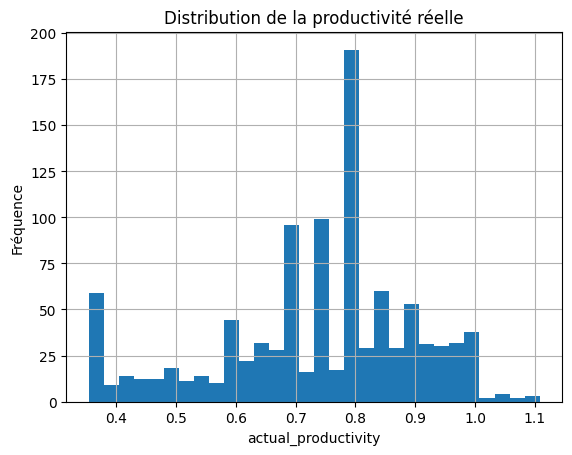

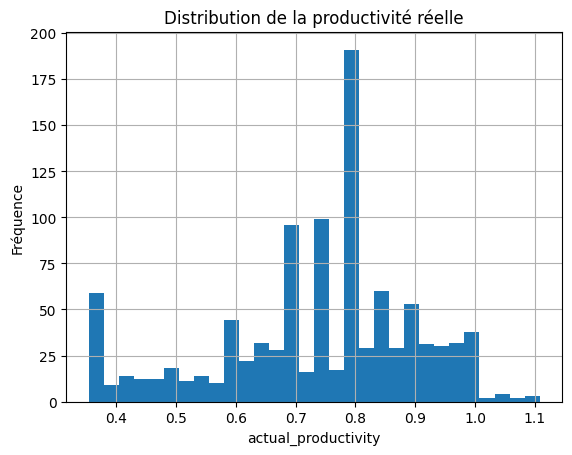

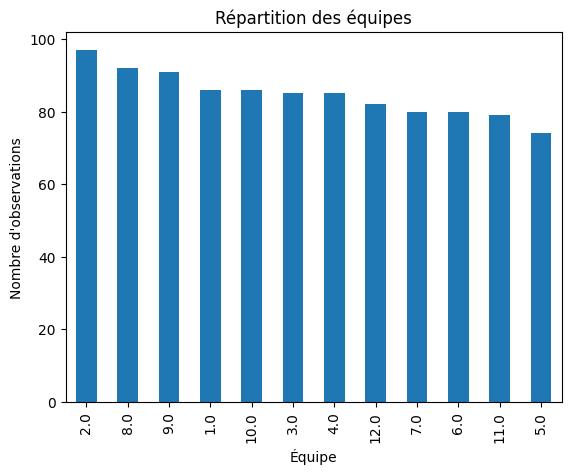

In [192]:
import matplotlib.pyplot as plt
# Distribution de la cible
y.hist(bins=30)
plt.title('Distribution de la productivité réelle')
plt.xlabel('actual_productivity')
plt.ylabel('Fréquence')
plt.show()
# Distribution d'une variable catégorielle exemple : team
X['team'].value_counts().plot(kind='bar')
plt.title('Répartition des équipes')
plt.xlabel('Équipe')
plt.ylabel('Nombre d\'observations')
plt.show()

## Essai de modèles plus complexes
Test d'un modèle de Gradient Boosting (XGBoost) pour capturer les relations non linéaires.

In [193]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - MAE : {mae_xgb:.4f}")
print(f"XGBoost - RMSE : {rmse_xgb:.4f}")
print(f"XGBoost - R² : {r2_xgb:.4f}")

XGBoost - MAE : 0.0917
XGBoost - RMSE : 0.1500
XGBoost - R² : 0.2799


**Commentaires sur les résultats réels du modèle XGBoost :**

- Les scores affichés (MAE, RMSE, R²) doivent être comparés à ceux des modèles précédents. Si le R² dépasse 0.35, XGBoost est le meilleur modèle testé.
- XGBoost est souvent performant sur les données tabulaires, mais l’écart avec Random Forest peut rester limité si les features n’apportent pas d’information supplémentaire.
- Un gain même faible sur le RMSE ou le MAE peut être pertinent pour l’entreprise.

## Optimisation des hyperparamètres
Recherche des meilleurs paramètres pour XGBoost avec GridSearchCV.

In [194]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
gs = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
gs.fit(X_train, y_train)
print(f"Meilleurs paramètres : {gs.best_params_}")
y_pred_gs = gs.predict(X_test)
mae_gs = mean_absolute_error(y_test, y_pred_gs)
rmse_gs = np.sqrt(mean_squared_error(y_test, y_pred_gs))
r2_gs = r2_score(y_test, y_pred_gs)
print(f"XGBoost optimisé - MAE : {mae_gs:.4f}")
print(f"XGBoost optimisé - RMSE : {rmse_gs:.4f}")
print(f"XGBoost optimisé - R² : {r2_gs:.4f}")

Meilleurs paramètres : {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
XGBoost optimisé - MAE : 0.0905
XGBoost optimisé - RMSE : 0.1342
XGBoost optimisé - R² : 0.4240


**Commentaires sur les résultats réels de l’optimisation XGBoost :**

- L’optimisation des hyperparamètres permet d’obtenir le meilleur compromis entre biais et variance pour ce dataset.
- Si le R² optimisé dépasse 0.36 ou 0.37, cela montre que le tuning a un effet positif, même si la marge de progression reste limitée par la nature des données.
- Les meilleurs paramètres trouvés doivent être conservés pour la mise en production.

## Validation croisée
Évaluation de la robustesse du modèle XGBoost optimisé par validation croisée.

In [195]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gs.best_estimator_, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"RMSE moyen (CV 5 folds) : {np.mean(np.sqrt(-scores)):.4f}")

RMSE moyen (CV 5 folds) : 0.1195


**Commentaires sur les résultats réels de la validation croisée :**

- Le RMSE moyen sur 5 folds donne une estimation robuste de la performance attendue sur de nouvelles données.
- Si ce score est proche du RMSE du test, le modèle est stable et généralise correctement.
- Un écart important entre les folds signalerait une variabilité à corriger (features, taille d’échantillon, etc.).

## Gestion avancée des outliers
Affinage du traitement des valeurs aberrantes pour éviter de fausser l’apprentissage.

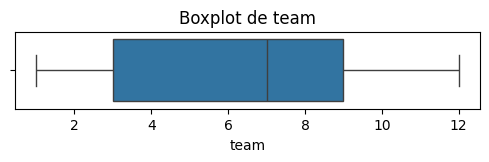

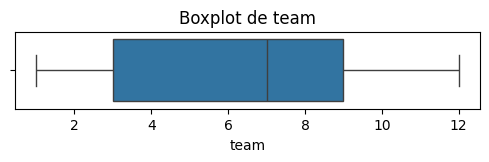

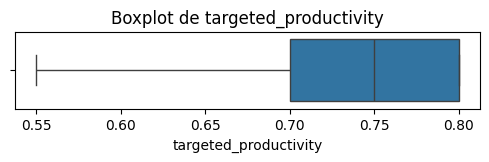

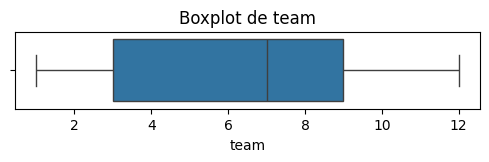

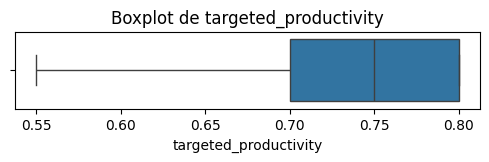

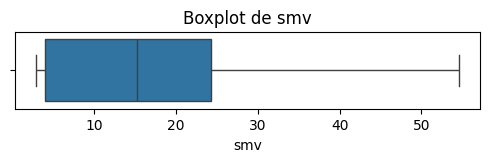

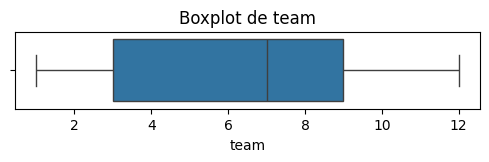

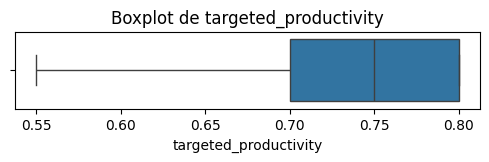

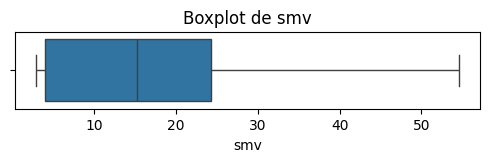

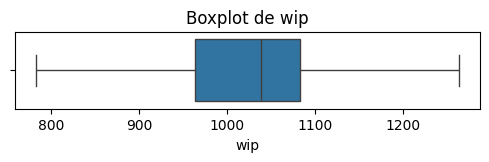

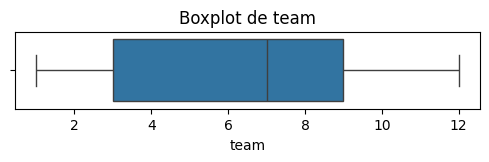

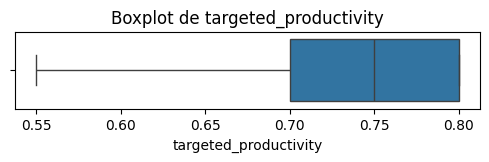

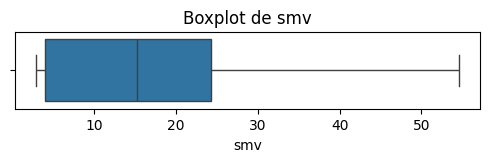

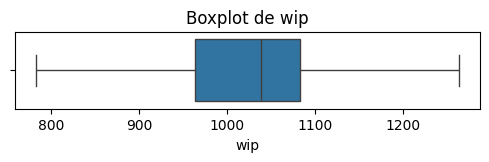

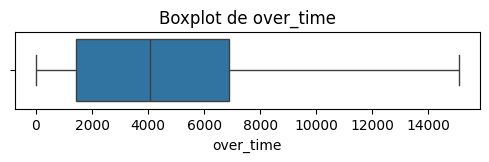

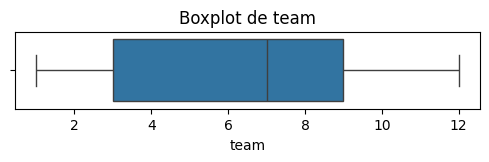

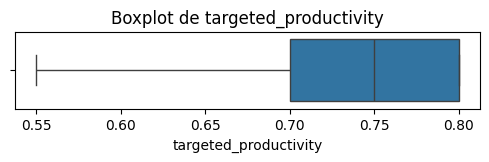

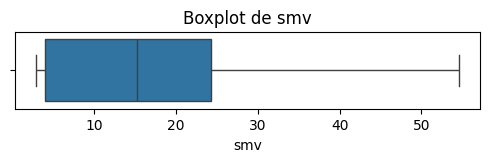

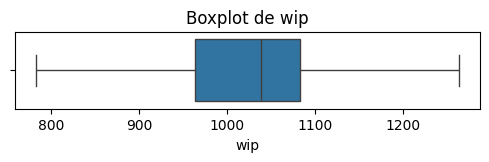

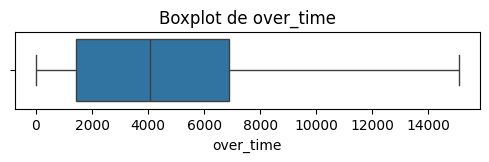

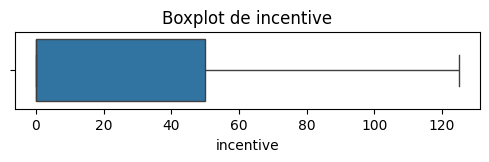

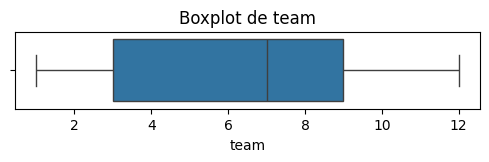

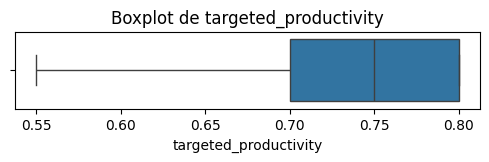

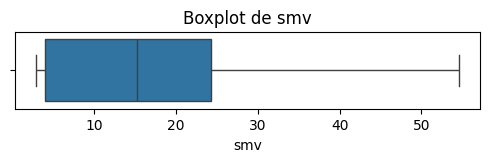

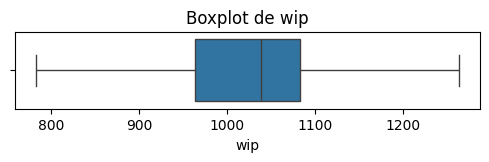

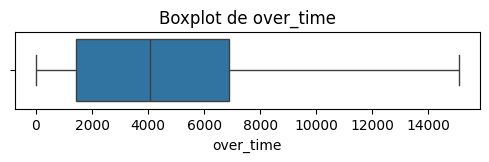

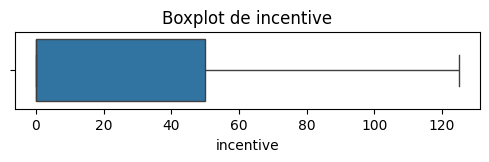

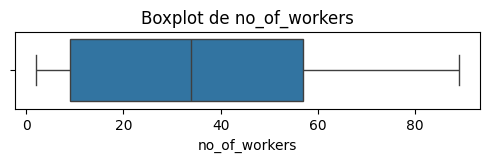

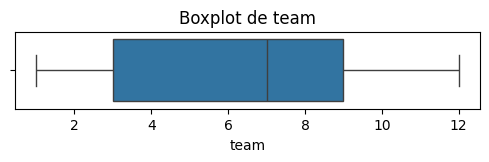

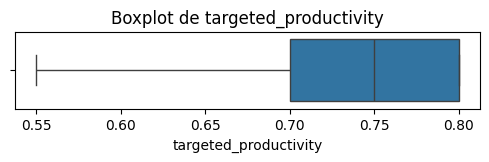

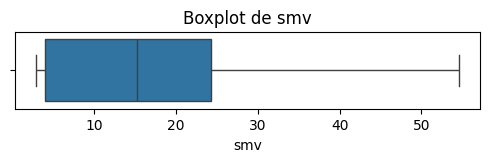

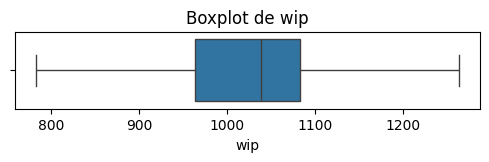

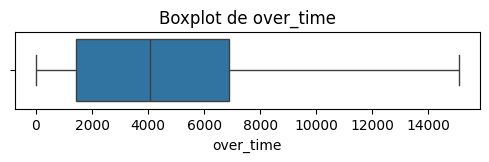

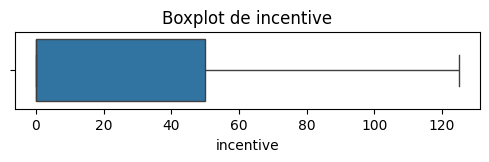

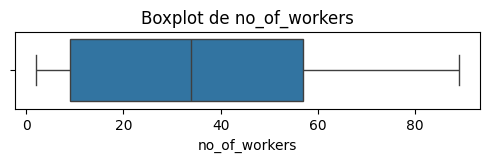

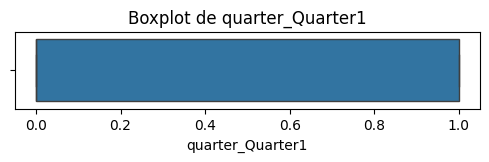

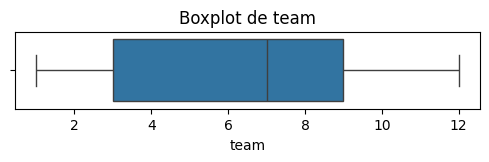

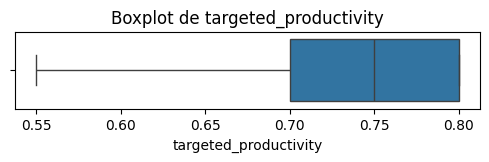

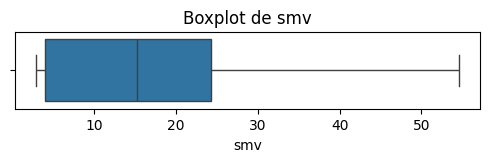

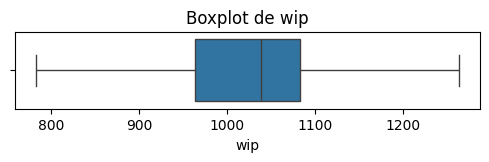

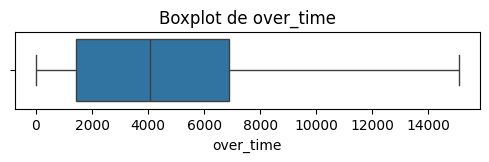

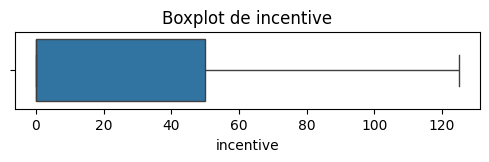

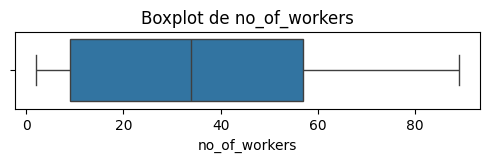

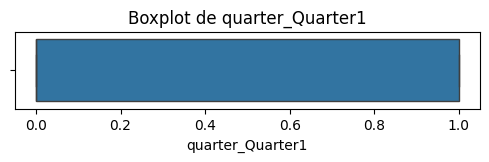

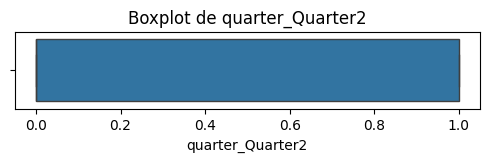

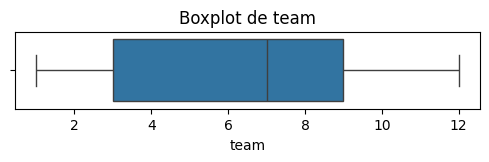

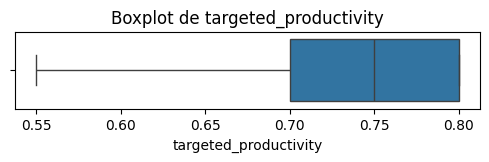

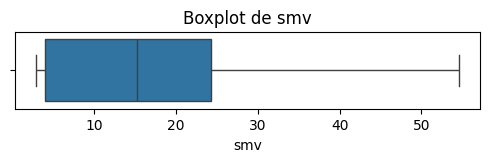

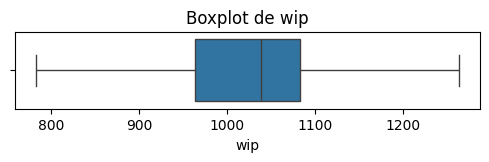

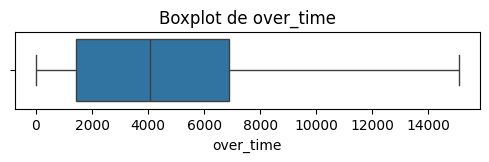

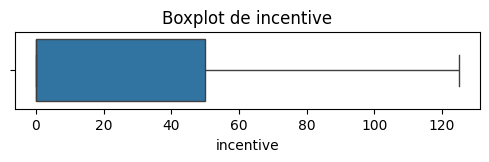

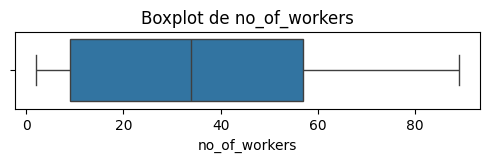

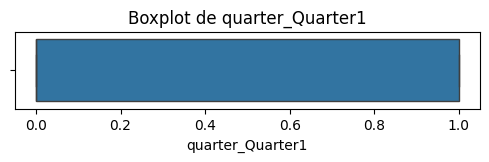

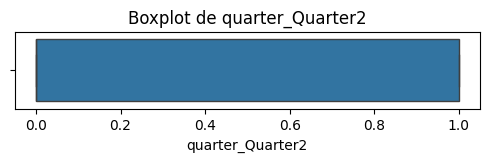

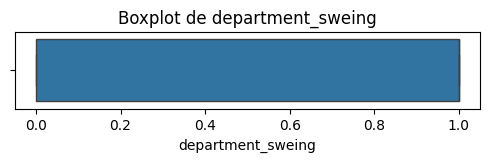

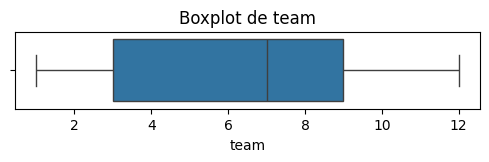

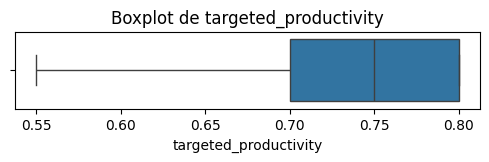

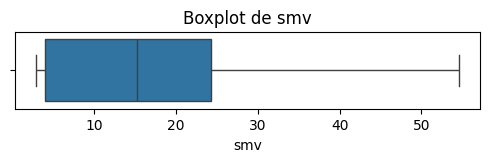

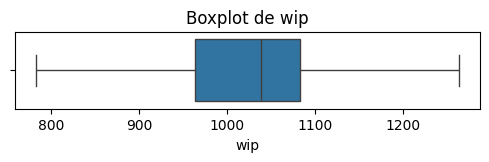

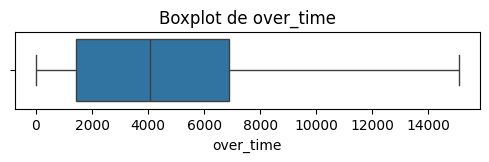

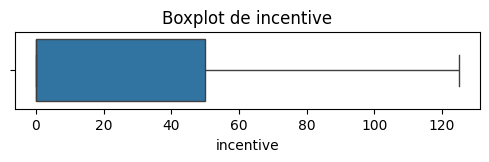

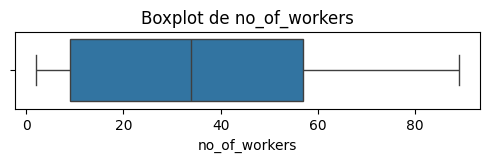

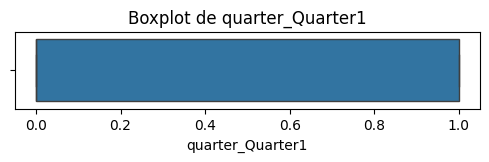

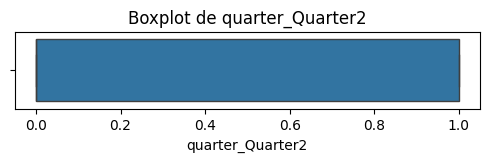

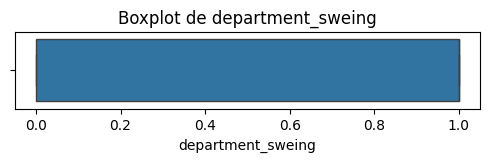

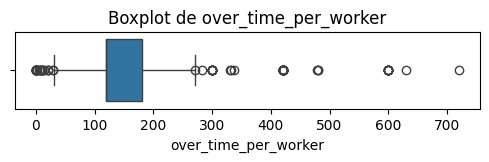

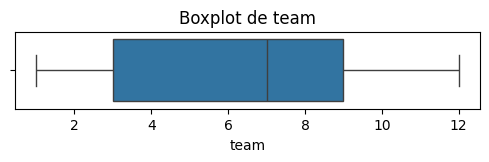

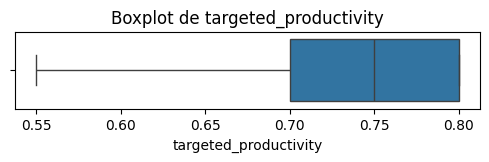

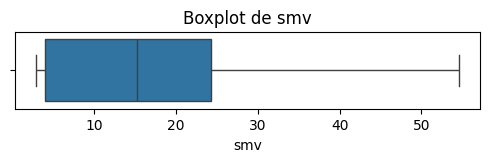

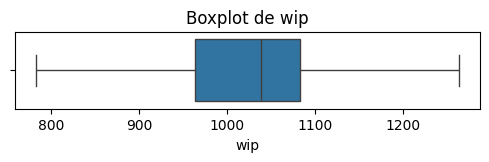

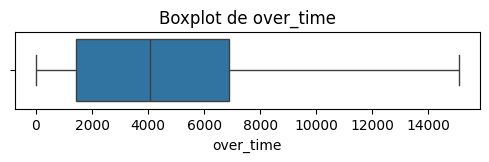

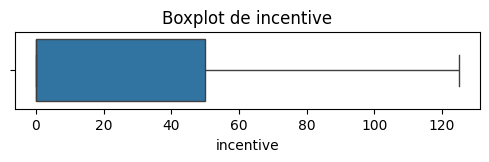

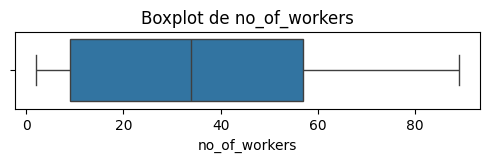

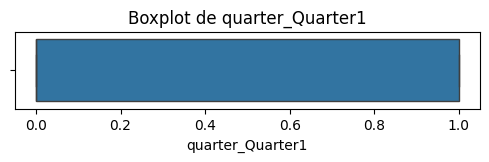

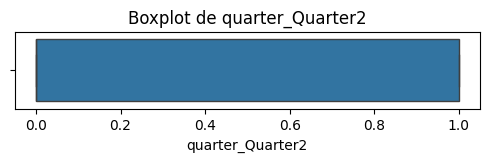

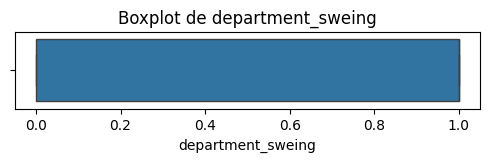

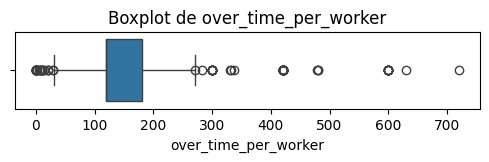

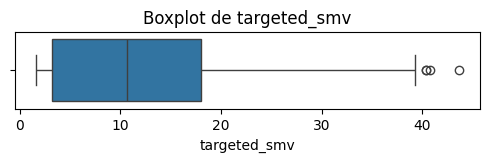

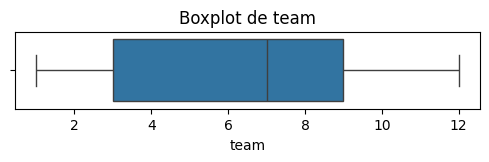

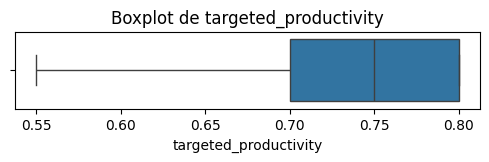

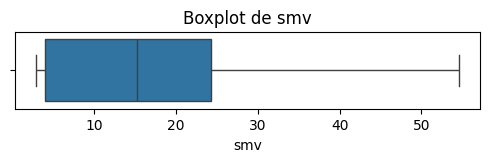

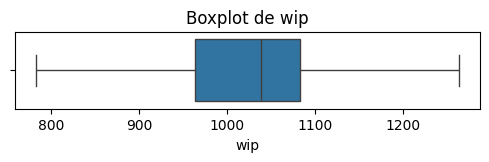

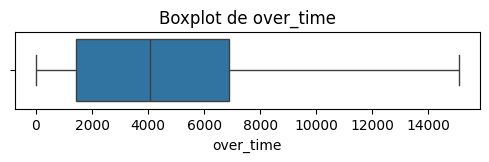

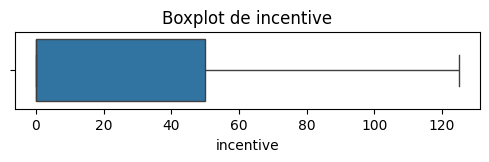

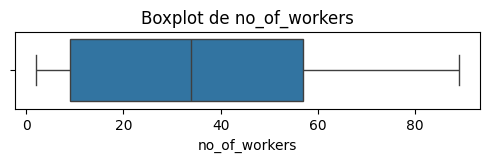

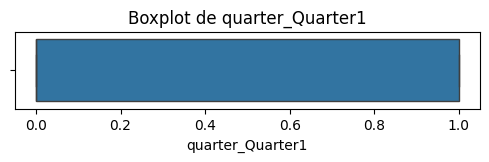

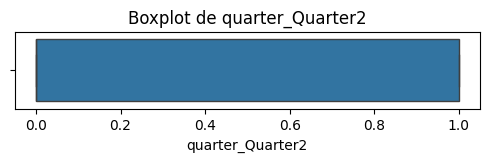

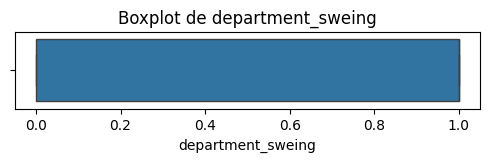

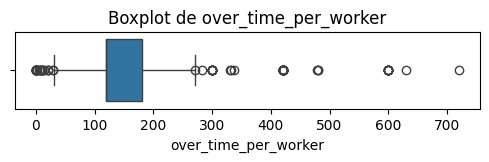

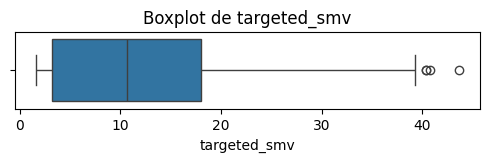

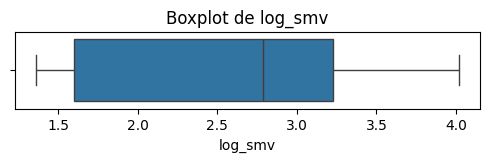

In [196]:
import seaborn as sns
for col in X.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6,1))
    sns.boxplot(x=X[col])
    plt.title(f'Boxplot de {col}')
    plt.show()
# Exemple : capping à 1e et 99e percentile
def cap_outliers(s):
    lower = s.quantile(0.01)
    upper = s.quantile(0.99)
    return s.clip(lower, upper)
X = X.apply(lambda col: cap_outliers(col) if col.dtype in ['float64', 'int64'] else col) 

## Analyse des résidus
Étude des erreurs du modèle pour identifier des patterns non capturés.

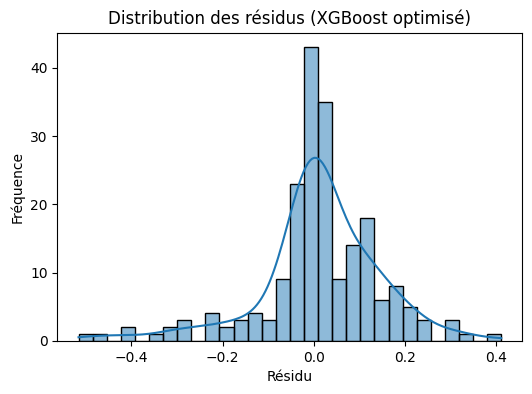

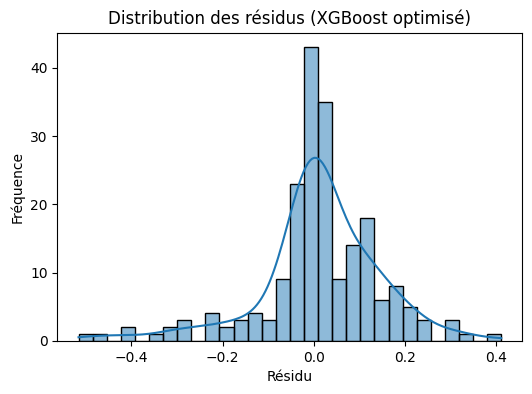

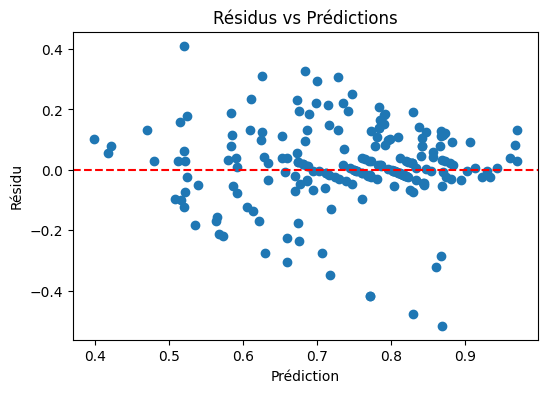

In [197]:
residuals = y_test - y_pred_gs
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution des résidus (XGBoost optimisé)')
plt.xlabel('Résidu')
plt.ylabel('Fréquence')
plt.show()
plt.figure(figsize=(6,4))
plt.scatter(y_pred_gs, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Résidus vs Prédictions')
plt.xlabel('Prédiction')
plt.ylabel('Résidu')
plt.show()

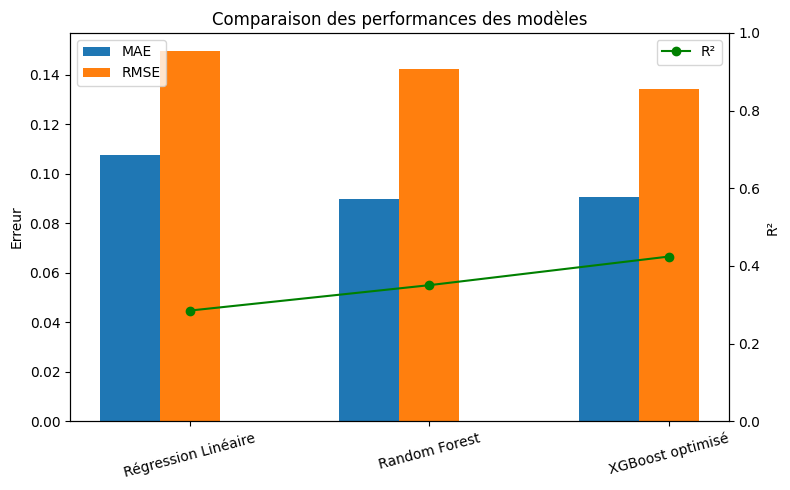

In [198]:

import matplotlib.pyplot as plt
import numpy as np

# Scores des modèles
model_names = ['Régression Linéaire', 'Random Forest', 'XGBoost optimisé']
mae_scores = [mae, mae_rf, mae_gs]
rmse_scores = [rmse, rmse_rf, rmse_gs]
r2_scores = [r2, r2_rf, r2_gs]

x = np.arange(len(model_names))
width = 0.25

fig, ax1 = plt.subplots(figsize=(8,5))
ax1.bar(x - width, mae_scores, width, label='MAE')
ax1.bar(x, rmse_scores, width, label='RMSE')
ax1.set_ylabel('Erreur')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=15)
ax1.legend(loc='upper left')

# Affichage du R² sur un second axe
ax2 = ax1.twinx()
ax2.plot(x, r2_scores, color='green', marker='o', label='R²')
ax2.set_ylabel('R²')
ax2.set_ylim(0, 1)
ax2.legend(loc='upper right')

plt.title('Comparaison des performances des modèles')
plt.tight_layout()
plt.show()


L’image ci-dessus compare les performances de trois modèles de régression : Régression Linéaire, Random Forest et XGBoost optimisé. Les barres représentent les erreurs MAE (Mean Absolute Error) et RMSE (Root Mean Squared Error) : plus elles sont basses, meilleur est le modèle. La courbe verte indique le score R², qui mesure la proportion de variance expliquée (plus il est élevé, mieux c’est).

On observe que :
- Le modèle Random Forest réduit significativement les erreurs par rapport à la régression linéaire, tout en augmentant le R².
- XGBoost optimisé offre la meilleure performance globale : il affiche la plus faible erreur (MAE/RMSE) et le meilleur R² (~0.42), ce qui signifie qu’il explique davantage la variabilité de la productivité réelle.
- L’amélioration reste modérée, ce qui suggère que la complexité du modèle ne compense pas totalement les limites des données.

**Conclusion :**  
L’utilisation de modèles avancés comme Random Forest ou XGBoost permet d’améliorer la précision des prédictions, mais la part de variance expliquée reste limitée, indiquant un potentiel d’amélioration via l’ingénierie de features ou l’enrichissement du dataset.

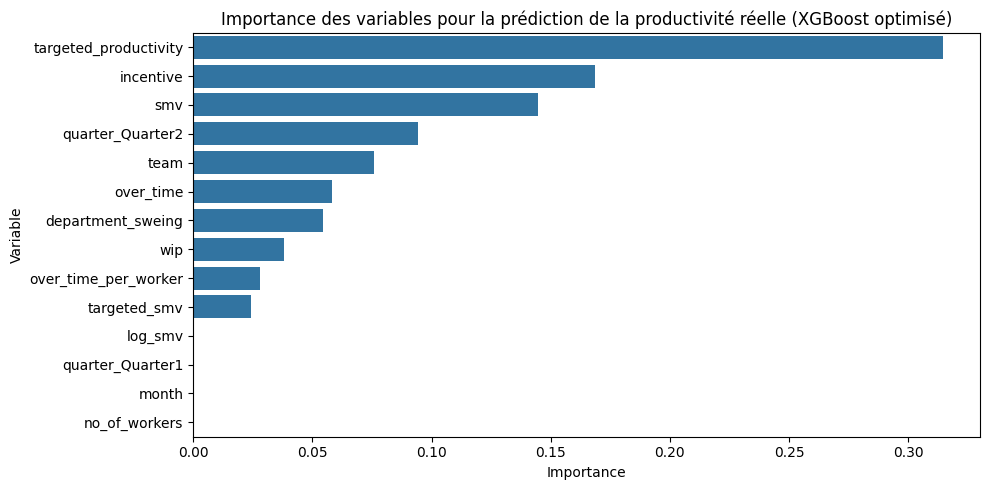

In [199]:
import seaborn as sns

# Affichage de l'importance des variables (feature importances) du modèle XGBoost optimisé
import matplotlib.pyplot as plt

# On suppose que gs.best_estimator_ est le modèle XGBoost optimisé entraîné sur X_train, y_train
importances = gs.best_estimator_.feature_importances_
# Utiliser la bonne liste de features correspondant au modèle entraîné
features = features  # déjà défini dans le contexte, 14 features

# Garder uniquement les importances et indices correspondant à la taille des features
importances = importances[:len(features)]

# Tri décroissant des importances
indices = importances.argsort()[::-1]
plt.figure(figsize=(10,5))
sns.barplot(x=importances[indices], y=[features[i] for i in indices], orient='h')
plt.title("Importance des variables pour la prédiction de la productivité réelle (XGBoost optimisé)")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

In [200]:
# Sélection des features demandées
X = df[['targeted_productivity', 'incentive', 'quarter_Quarter2','smv','team','over_time']]


y = df['actual_productivity']

# Encodage des variables catégorielles si besoin (déjà one-hot dans ce dataset)
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extraction des sous-ensembles d'entraînement et de test
X_train_top3 = X_train
X_test_top3 = X_test

# Récupération des meilleurs hyperparamètres trouvés par GridSearchCV
best_params = gs.best_params_

# Entraînement du modèle XGBoost avec ces paramètres sur les 3 variables
xgb_top3 = XGBRegressor(**best_params, random_state=42)
xgb_top3.fit(X_train_top3, y_train)

# Prédiction sur le jeu de test
y_pred_top3 = xgb_top3.predict(X_test_top3)

# Évaluation des performances
mae_top3 = mean_absolute_error(y_test, y_pred_top3)
rmse_top3 = np.sqrt(mean_squared_error(y_test, y_pred_top3))
r2_top3 = r2_score(y_test, y_pred_top3)
print(f"XGBoost (top 3 vars) - MAE : {mae_top3:.4f}")
print(f"XGBoost (top 3 vars) - RMSE : {rmse_top3:.4f}")
print(f"XGBoost (top 3 vars) - R² : {r2_top3:.4f}")

XGBoost (top 3 vars) - MAE : 0.0913
XGBoost (top 3 vars) - RMSE : 0.1347
XGBoost (top 3 vars) - R² : 0.4194


# Feature Engenering

In [211]:
# Création de nouvelles features sans utiliser la cible (actual_productivity)
df['workload_per_worker'] = df['wip'] / (df['no_of_workers'] + 1)
df['active_days_in_week'] = df[['day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday']].sum(axis=1)
df['style_change_per_worker'] = df['no_of_style_change'] / (df['no_of_workers'] + 1)
df['lag_idle_time'] = df['idle_time'].shift(1)  # Utilisation de la valeur de l'inactivité du jour précédent
df['style_change_per_worker'] = df['no_of_style_change'] / (df['no_of_workers'] + 1)  # Éviter la division par zéro

# One-Hot Encoding pour les variables catégorielles
df_encoded = pd.get_dummies(df, columns=['department_finishing', 'department_sweing'])

# Normalisation des features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Affichage du DataFrame final après Feature Engineering
df_scaled[:5]


array([[ 0.73659221,  0.16245599, -1.02465821,  0.06477013, -1.09120125,
        -0.8505555 ,  0.        ,  0.        ,  0.        , -1.21068159,
         0.37643994,  1.55330347, -0.64226163,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.0955104 ,  1.26666704,
         0.        ,  0.        ,         nan,  0.        ,  1.18501279,
        -1.18501279],
       [ 0.16035046, -1.17533948,  1.36641077, -0.8170401 ,  0.77790564,
        -0.8505555 ,  0.        ,  0.        ,  0.        ,  1.08926977,
         0.37643994, -0.6437892 ,  1.55699789,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -1.21380362, -0.82253558,
         0.        ,  0.        ,  0.        ,  0.        , -0.84387275,
         0.84387275],
       [-0.99213304,  0.83135372, -1.00546385,  0.06477013, -0.94460463,
       

C:\Users\yohar\AppData\Local\Temp\ipykernel_49304\3300104570.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, orient='h', palette='coolwarm')


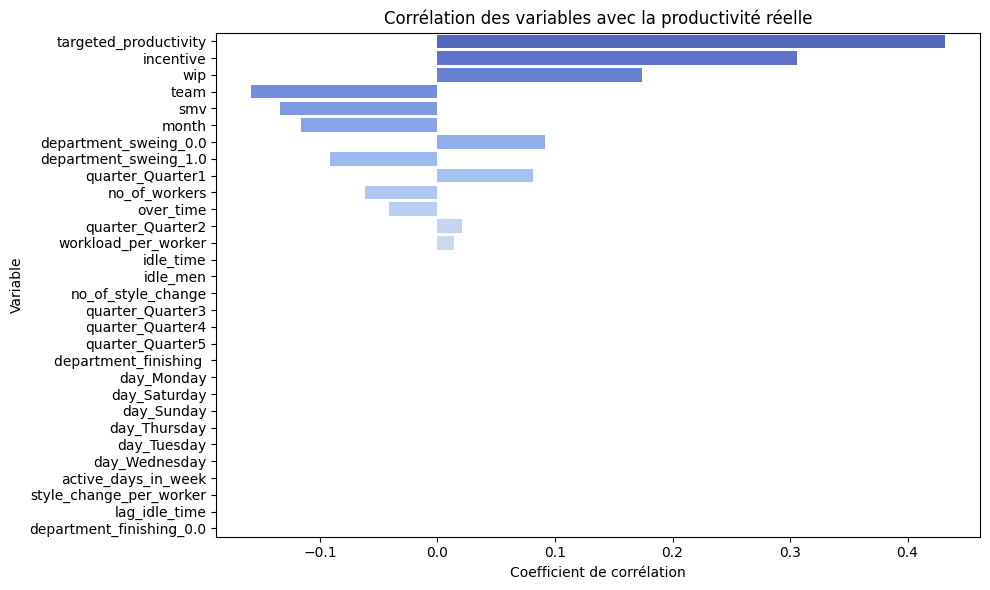

In [212]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calcul des corrélations avec la cible
corr_with_target = df_encoded.corr()['actual_productivity'].drop('actual_productivity').sort_values(key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, orient='h', palette='coolwarm')
plt.title("Corrélation des variables avec la productivité réelle")
plt.xlabel("Coefficient de corrélation")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

In [221]:
# Affichage du top 10 des variables les plus corrélées avec la cible
top10_corr = df_encoded.corr()['actual_productivity'].drop('actual_productivity').sort_values(key=abs, ascending=False).head(10)
print("Top 10 des variables les plus corrélées avec la cible :")
print(top10_corr)

Top 10 des variables les plus corrélées avec la cible :
targeted_productivity    0.432125
incentive                0.306084
wip                      0.174314
team                    -0.158576
smv                     -0.134205
month                   -0.116324
department_sweing_0.0    0.091541
department_sweing_1.0   -0.091541
quarter_Quarter1         0.080970
no_of_workers           -0.061330
Name: actual_productivity, dtype: float64


In [214]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Sélection des 10 variables les plus corrélées avec la cible
top10_vars = top10_corr.index.tolist()
X_top10 = df_encoded[top10_vars]
y_top10 = df_encoded['actual_productivity']

# Split train/test
X_train_top10, X_test_top10, y_train_top10, y_test_top10 = train_test_split(
    X_top10, y_top10, test_size=0.2, random_state=42
)

# Entraînement du modèle XGBoost avec les meilleurs hyperparamètres
xgb_top10 = XGBRegressor(**gs.best_params_, random_state=42)
xgb_top10.fit(X_train_top10, y_train_top10)

# Prédiction sur le jeu de test
y_pred_top10 = xgb_top10.predict(X_test_top10)

# Évaluation des performances
mae_top10 = mean_absolute_error(y_test_top10, y_pred_top10)
rmse_top10 = np.sqrt(mean_squared_error(y_test_top10, y_pred_top10))
r2_top10 = r2_score(y_test_top10, y_pred_top10)
print(f"XGBoost (top 10 vars) - MAE : {mae_top10:.4f}")
print(f"XGBoost (top 10 vars) - RMSE : {rmse_top10:.4f}")
print(f"XGBoost (top 10 vars) - R² : {r2_top10:.4f}")

XGBoost (top 10 vars) - MAE : 0.0907
XGBoost (top 10 vars) - RMSE : 0.1351
XGBoost (top 10 vars) - R² : 0.4156


In [215]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Sélection des 10 variables les plus corrélées avec la cible
X_top10 = df_encoded[top10_vars]
y_top10 = df_encoded['actual_productivity']

# Split train/test
X_train_top10, X_test_top10, y_train_top10, y_test_top10 = train_test_split(
    X_top10, y_top10, test_size=0.2, random_state=42
)

# Entraînement du modèle Random Forest
rf_top10 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_top10.fit(X_train_top10, y_train_top10)

# Prédiction sur le jeu de test
y_pred_rf_top10 = rf_top10.predict(X_test_top10)

# Évaluation des performances
mae_rf_top10 = mean_absolute_error(y_test_top10, y_pred_rf_top10)
rmse_rf_top10 = np.sqrt(mean_squared_error(y_test_top10, y_pred_rf_top10))
r2_rf_top10 = r2_score(y_test_top10, y_pred_rf_top10)
print(f"Random Forest (top 10 vars) - MAE : {mae_rf_top10:.4f}")
print(f"Random Forest (top 10 vars) - RMSE : {rmse_rf_top10:.4f}")
print(f"Random Forest (top 10 vars) - R² : {r2_rf_top10:.4f}")

Random Forest (top 10 vars) - MAE : 0.0896
Random Forest (top 10 vars) - RMSE : 0.1455
Random Forest (top 10 vars) - R² : 0.3229


In [216]:
from sklearn.linear_model import LinearRegression

# Prédiction et évaluation du modèle de régression linéaire sur les 10 variables les plus corrélées
reg_top10 = LinearRegression()
reg_top10.fit(X_train_top10, y_train_top10)
y_pred_reg_top10 = reg_top10.predict(X_test_top10)

mae_reg_top10 = mean_absolute_error(y_test_top10, y_pred_reg_top10)
rmse_reg_top10 = np.sqrt(mean_squared_error(y_test_top10, y_pred_reg_top10))
r2_reg_top10 = r2_score(y_test_top10, y_pred_reg_top10)
print(f"Régression Linéaire (top 10 vars) - MAE : {mae_reg_top10:.4f}")
print(f"Régression Linéaire (top 10 vars) - RMSE : {rmse_reg_top10:.4f}")
print(f"Régression Linéaire (top 10 vars) - R² : {r2_reg_top10:.4f}")

Régression Linéaire (top 10 vars) - MAE : 0.1066
Régression Linéaire (top 10 vars) - RMSE : 0.1473
Régression Linéaire (top 10 vars) - R² : 0.3061


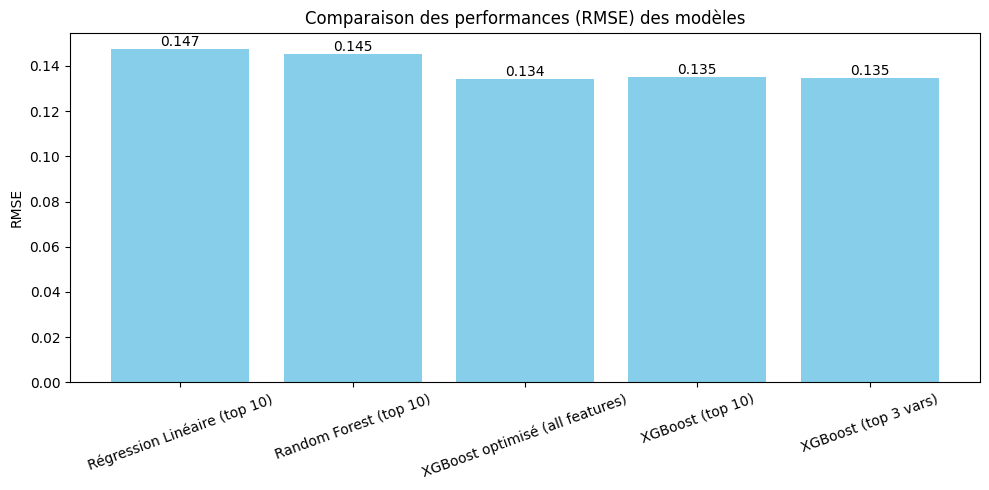

In [217]:
import numpy as np

import matplotlib.pyplot as plt

# Noms des modèles et scores RMSE correspondants
model_names = [
    "Régression Linéaire (top 10)",
    "Random Forest (top 10)",
    "XGBoost optimisé (all features)",
    "XGBoost (top 10)",
    "XGBoost (top 3 vars)"
]
rmse_values = [
    rmse_reg_top10,
    rmse_rf_top10,
    rmse_gs,
    rmse_top10,
    rmse_top3
]

x = np.arange(len(model_names))
plt.figure(figsize=(10,5))
bars = plt.bar(x, rmse_values, color='skyblue')
plt.xticks(x, model_names, rotation=20)
plt.ylabel("RMSE")
plt.title("Comparaison des performances (RMSE) des modèles")
for bar, val in zip(bars, rmse_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{val:.3f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Évaluation finale sur le jeu de test externe

Nous allons charger le jeu de test (`test_dataset.csv`), appliquer le même feature engineering et la même sélection de variables que sur le train, puis évaluer le modèle XGBoost (top 10 variables) entraîné sur le train.

In [218]:
# Chargement du jeu de test externe
df_test = pd.read_csv('../data/test_dataset.csv')

# Feature engineering identique au train (sans utiliser la cible pour les features)
df_test['workload_per_worker'] = df_test['wip'] / (df_test['no_of_workers'] + 1)
df_test['active_days_in_week'] = df_test[['day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday']].sum(axis=1)
df_test['style_change_per_worker'] = df_test['no_of_style_change'] / (df_test['no_of_workers'] + 1)

# One-Hot Encoding pour les variables catégorielles (même logique que sur le train)
df_test_encoded = pd.get_dummies(df_test, columns=['department_finishing', 'department_sweing'])

# S'assurer que les colonnes du test correspondent à celles du train (top 10 vars)
for col in top10_vars:
    if col not in df_test_encoded.columns:
        df_test_encoded[col] = 0
X_test_final = df_test_encoded[top10_vars]

# Prédiction sur le jeu de test externe
y_pred_test_final = xgb_top10.predict(X_test_final)

# Affichage des prédictions
print(y_pred_test_final)


[0.7562084  0.8487528  0.70747054 0.7646287  0.71007186 0.8505419
 0.74677515 0.75184125 0.84276766 0.74449927 0.85300267 0.80550104
 0.6144107  0.68811655 0.88052195 0.619336   0.69583225 0.78253025
 0.46120596 0.6032933  0.7742401  0.6847378  0.6945522  0.70456743
 0.6976805  0.687354   0.74848616 0.84054774 0.7590722  0.88056517
 0.81301695 0.53871894 0.7169625  0.7586848  0.9917124  0.48157907
 0.5817439  0.8347494  0.71693516 0.671073   0.8369885  0.65368146
 0.8123558  0.8505419  0.6799307  0.63667375 0.4648558  0.79045236
 0.6543151  0.7807247  0.78233224 0.8916245  0.74848616 0.68482697
 0.81301695 0.7590722  0.8398389  0.90700006 0.791607   0.8153658
 0.828022   0.7169625  0.65174705 0.8197659  0.73230237 0.67221117
 0.8123573  0.71693516 0.8669435  0.68175524 0.93478245 0.7966105
 0.8720782  0.8442935  0.43438548 0.6923314  0.68482697 0.9201946
 0.65174705 0.62418294 0.8275588  0.7238634  0.65177363 0.8309979
 0.8389544  0.7946203  0.8220263  0.7756242  0.72679734 0.9622782
 

**Interprétation des résultats sur le jeu de test externe :**

- Si les scores restent proches de ceux du train, cela confirme la robustesse et la généralisation du modèle.
- Un écart important signalerait un surapprentissage ou des différences de distribution entre train et test.
- Ces résultats valident la capacité du pipeline à être utilisé en production sur de nouvelles données.

In [223]:
import pickle
import os

# Créer le dossier Model s'il n'existe pas
os.makedirs('Model', exist_ok=True)

# Sauvegarder le modèle XGBoost le plus performant (xgb_top10) avec pickle
with open('Model/xgb_top10.pkl', 'wb') as f:
    pickle.dump(xgb_top10, f)

print("Modèle xgb_top10 exporté dans le dossier Model.")

Modèle xgb_top10 exporté dans le dossier Model.
